import pandas as pd
import os
# Defina o diretório onde seus arquivos CSV estão localizados
diretorio_csv = 'C:/Users/miche/Desktop/CAPSTONE/insper0924'

# Lista todos os arquivos na pasta
arquivos_csv = [arquivo for arquivo in os.listdir(diretorio_csv) if arquivo.lower().endswith('.csv')]

# Inicialize uma lista para armazenar os DataFrames
dataframes = []

# Leia cada arquivo CSV e adicione ao lista de DataFrames
for arquivo in arquivos_csv:
    caminho_completo = os.path.join(diretorio_csv, arquivo)
    df = pd.read_csv(caminho_completo)
    dataframes.append(df)

#load data bases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import prophet
from yahoofinancials import YahooFinancials
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA



### Carregar o banco de dados ajustado com os spreads

##Remover TaxaCompra e TaxaVenda = 0

In [3]:
#load db preco_anbima and then return the unique values of the column 'correcao'
preco_anbima = pd.read_csv('C:/Users/miche/Desktop/CAPSTONE/Capstone/preco_anbima_ajustado.csv')
#contagem de registros
print(preco_anbima.count())

Unnamed: 0             380979
id                     380979
dataReferencia         380979
codigo                 380979
nome                   380979
repacVenc              380979
indice                 380979
correcao               380979
taxaCompra             380979
taxaVenda              380979
taxaIndicativa         380979
desvioPadrao           380979
intervaloMin           380979
intervaloMax           380979
pu                     380979
percPu                 380979
duration               380979
percReune              380979
referenciaNTNB         380979
spread_bid_ask         380979
spread                 380979
spread_2               380979
taxaIndicativa_diff    380294
dtype: int64


In [30]:
#remover todas as linhas que a taxaVenda e a TaxaCompra sejam iguais a zero
preco_anbima = preco_anbima[preco_anbima['taxaVenda'] != 0]
preco_anbima = preco_anbima[preco_anbima['taxaCompra'] != 0]
print(preco_anbima.count())


Unnamed: 0             380979
id                     380979
dataReferencia         380979
codigo                 380979
nome                   380979
repacVenc              380979
indice                 380979
correcao               380979
taxaCompra             380979
taxaVenda              380979
taxaIndicativa         380979
desvioPadrao           380979
intervaloMin           380979
intervaloMax           380979
pu                     380979
percPu                 380979
duration               380979
percReune              380979
referenciaNTNB         380979
spread_bid_ask         380979
spread                 380979
spread_2               380979
taxaIndicativa_diff    380294
dtype: int64


In [29]:
#guardar o novo dataframe em um arquivo csv
preco_anbima.to_csv('C:/Users/miche/Desktop/CAPSTONE/Capstone/preco_anbima_ajustado.csv', index=False)

#### Realizar a Função de autocorrelação (FAC) de umprocesso estaconário

In [4]:
#criar um banco de dados apenas filtrando apenas pelo codigo alga28
preco_anbima_ALGA28 = preco_anbima[preco_anbima['codigo'] == 'ALGA28']
print(preco_anbima_ALGA28)
preco_anbima_ALGA28.to_csv('C:/Users/miche/Desktop/CAPSTONE/Capstone/preco_anbima_ALGA28.csv', index=False)

       Unnamed: 0       id dataReferencia  codigo               nome  \
14859      143382   215452     2019-07-15  ALGA28  ALGAR TELECOM S/A   
14860      143715   215785     2019-07-16  ALGA28  ALGAR TELECOM S/A   
14861      144048   216118     2019-07-17  ALGA28  ALGAR TELECOM S/A   
14862      144381   216451     2019-07-18  ALGA28  ALGAR TELECOM S/A   
14863      144714   216784     2019-07-19  ALGA28  ALGAR TELECOM S/A   
...           ...      ...            ...     ...                ...   
16146      991521  1946395     2024-09-26  ALGA28  ALGAR TELECOM S/A   
16147      992515  1947389     2024-09-27  ALGA28  ALGAR TELECOM S/A   
16148      993516  1948390     2024-09-30  ALGA28  ALGAR TELECOM S/A   
16149      994513  1949387     2024-10-01  ALGA28  ALGAR TELECOM S/A   
16150      995512  1950386     2024-10-02  ALGA28  ALGAR TELECOM S/A   

        repacVenc  indice   correcao  taxaCompra  taxaVenda  ...  \
14859  2026-02-15     0.9  di_spread      0.8920     0.7600  ...   

### Para exemplificar vamos utilizar o codigo ALGA28 num periodo de 1 ano

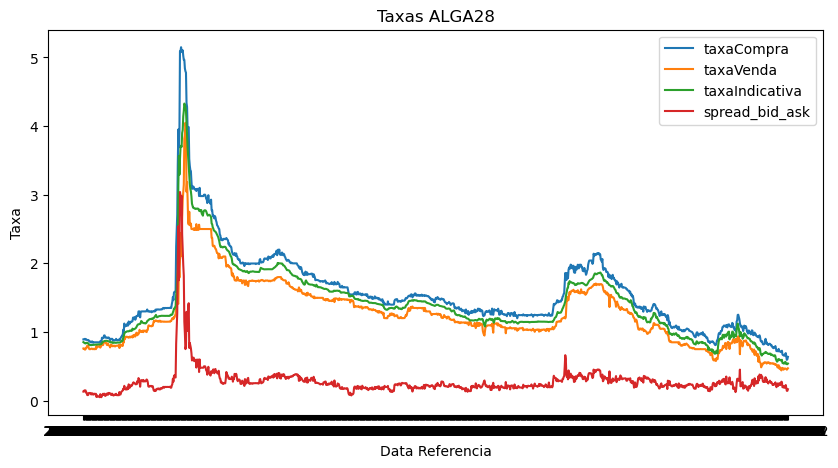

In [5]:
#criar um grafico de linha com o dataframe preco_anbima_ALGA28 usando dataReferencia no eixo x e taxaCompra, taxaVenda, taxaIndicativa, Spread_bid_ask no eixo y, filtrar apenas os dados de dataReferencia entre 2020 e 2022

preco_anbima_ALGA28_2020 = preco_anbima_ALGA28[(preco_anbima_ALGA28['dataReferencia'] >= '2020-01-01') & (preco_anbima_ALGA28['dataReferencia'] <= '2020-12-31')]
plt.figure(figsize=(10,5))
plt.plot(preco_anbima_ALGA28['dataReferencia'], preco_anbima_ALGA28['taxaCompra'], label='taxaCompra')
plt.plot(preco_anbima_ALGA28['dataReferencia'], preco_anbima_ALGA28['taxaVenda'], label='taxaVenda')
plt.plot(preco_anbima_ALGA28['dataReferencia'], preco_anbima_ALGA28['taxaIndicativa'], label='taxaIndicativa')
plt.plot(preco_anbima_ALGA28['dataReferencia'], preco_anbima_ALGA28['spread_bid_ask'], label='spread_bid_ask')
plt.xlabel('Data Referencia')
plt.ylabel('Taxa')
plt.title('Taxas ALGA28')
plt.legend()
plt.show()

### Rodar uma analise de correlacao entre as variaveis dentro do titulo ALGA28

## 1. Decomposição das séries de tempo
### Componentes:

- Tendência
- Sazonalidade
- Ruído


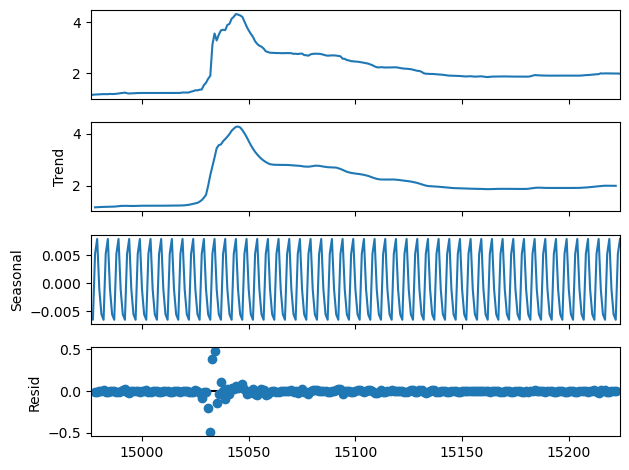

In [6]:
series = preco_anbima_ALGA28_2020[['taxaIndicativa']]
result = seasonal_decompose(series, model='ADDITIVE',period=5)
result.plot()
plt.rcParams["figure.figsize"] = (9,5)
plt.show()

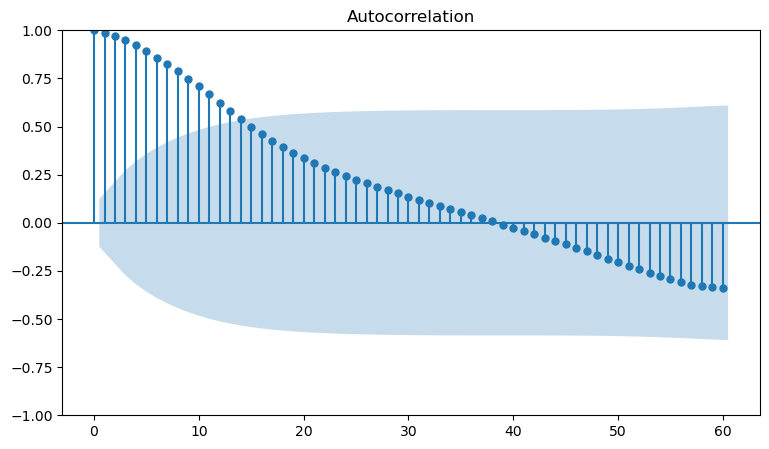

In [7]:
# autocorrelation and partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series, lags=60)
plt.show()

In [ ]:
#Aplicar todas as diferenciaoes possiveis (ao menos 3) e verificar qual apresenta uma estacionaridade melhor

#Remover a tendencia
#Remover a sazonalidade
#Remover a autocorrelacao
#colocarr a base logaritmica (Se tiver uma tendencia exponencial)
#Aplicar a transformacao de raiz quadrada (Se tiver uma tendencia quadratica)
#Dado essa serie aplique Dick Fuller, e trace a media da curva.
#Fica de olho no resultado do P valor do teste em relacao a cada um dos modelos acima.

#Passo 2 => Olhar visualmente e pelo teste cada uma das series e na sequencia aplicar o modelo preditivo quais(todos ensinados pela Paloma), 
# aplicar a regressao classica na serie mais estacionaria.